In [25]:
import importlib
import pymate
import matplotlib.pyplot as plt
import random
pymate = importlib.reload(pymate)

In [11]:
def update_github_files():
    !git add ReproductiveSkewSimulations.ipynb
    !git add ReproductiveSkewSimulations_v2.ipynb
    !git add fertSignals_0d_GA_v2.ipynb
    !git add pymate.py
    !git add pymate_tests.ipynb
    !git add pymate_gui.py
    !git commit -m "bug fixes"
    !git push -u origin master
    
update_github_files()

[master 93682bc] bug fixes
 3 files changed, 41 insertions(+), 15 deletions(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 1016 bytes | 508.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To github.com:kevinrosenfield/pymate.git
   bb8e20a..93682bc  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


In [22]:
pymate.seasonality = 0.97
pymate.number_generations = 1000
pymate.number_females = 10
pymate.number_males = 10
model = pymate.population()
#model.evolve()

In [29]:
pymate.seasonality = 0.6
pymate.days_gestation_plus_lactation = 200
model = pymate.population()

model.groups[0].go_one_mating_season()
print([m.id for m in model.groups[0].mothers])
print([f.id for f in model.groups[0].fathers])
model.groups[0].generate_offspring(model.max_non_cycling_days,
                           model.conception_probability_list,
                           model.mean_days_to_conception, model.sd_days_to_conception)
[m.id for m in model.groups[0].males]

# f = model.groups[0].plot_conception_probabilities((8,8))
# a = plt.hist([m.id for m in model.groups[0].fathers], bins=len(set(model.groups[0].fathers)))
# x = plt.xlim([0,9])
# y = plt.title("Offspring per male")

[0, 5, 0, 1, 3, 2, 6, 4, 9, 7, 8, 5, 1, 3, 4, 9, 2, 8, 2, 6]
[0, 0, 1, 3, 0, 0, 5, 3, 3, 2, 2, 1, 0, 1, 3, 0, 1, 1, 1, 4]
[[0, 0], [5, 0], [0, 1], [1, 3], [3, 0], [2, 0], [6, 5], [4, 3], [9, 3], [7, 2], [8, 2], [5, 1], [1, 0], [3, 1], [4, 3], [9, 0], [2, 1], [8, 1], [2, 1], [6, 4]]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

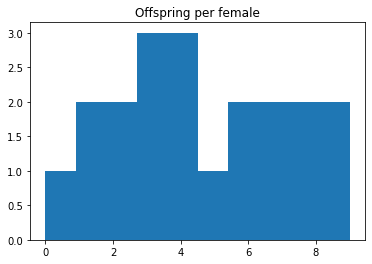

In [7]:
x = plt.hist([m.id for m in model.groups[0].mothers], bins=len(set(model.groups[0].mothers)))
y = plt.title("Offspring per female")

## The evolutionary algortihm

<br>
<font size="4">
    
* Some heritable component of male quality influences rank
* I'm calling it competitive effort
* The probability of acheiving high rank is tied to the magnitude of a male's competitive effort
* There is also some cost imposed, depending on the magnitude of competitive effort
* The cost could be a shorter mating season for that male
* High ranking males with high competitive effort will have lots of HIGH RANKING offspring
* High ranking males without high competitive effort will have lots of offspring </font>

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
2

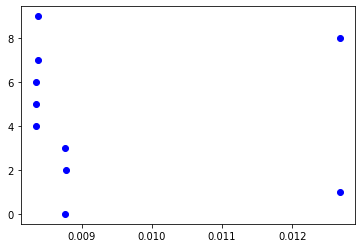

In [936]:
pymate = importlib.reload(pymate)
pymate.seasonality = 0.9
pymate.number_groups = 1
pymate.number_generations = 500
model = pymate.population()
model.evolve()
x = [plt.plot(m.contest, m.id, 'bo') for m in model.groups[0].males]

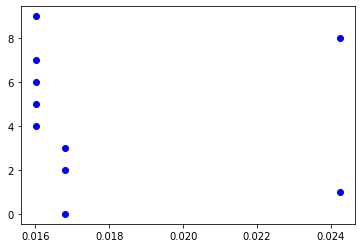

In [938]:
x = [plt.plot(m.total_quality, m.id, 'bo') for m in model.groups[0].males]

In [ ]:
pymate.seasonality = 0.0
pymate.number_generations = 100000
model = pymate.population()
model.evolve()
x = [plt.plot(m.contest, m.id, 'bo') for m in model.groups[0].males]

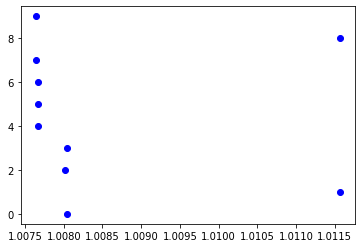

In [939]:
x = [plt.plot(m.scramble, m.id, 'bo') for m in model.groups[0].males]

In [ ]:
pymate.fixed_number_of_cycles = False
for _ in range(100):
    for i in [0.0,0.2,0.4,0.6,0.8,1.0]:
        pymate.seasonality = i
        model = pymate.population()
        model.groups[0].go_one_mating_season()
#         plt.plot(i, round(len(
#             [_ for _ in model.groups[0].daily_conception_probability_counts if _ > 1]) / len(
#             [_ for _ in model.groups[0].daily_conception_probability_counts if _ > 0]),3),'bo')
        plt.plot(i, max(model.groups[0].daily_conception_probability_counts),'bo')


In [ ]:

fig = plt.plot(model.groups[0].daily_conception_probability_sums)
plt.ylim([0,1])

fig2 = plt.figure()
plt.hist(model.groups[0].daily_conception_probability_counts, density = True, bins=np.arange(4)-0.5)
plt.xticks([0,1,2])

len([_ for _ in model.groups[0].daily_conception_probability_counts if _ > 1]) / len(model.groups[0].daily_conception_probability_counts)


In [588]:
i = 0.04

while abs(365 * (1 - i) + (28 * (1 - i)) - 365) > 0.005:
    i += 0.00001

x = 1 - (1 - i) * 0.5

(28 * (1 - x))

13.00263999999995

In [ ]:
f = model.groups[0].plot_conception_probabilities()

In [ ]:
[f.id for f in model.groups[0].plot_conception_probabilities

## Operationalizing Seasonality

<br>
<font size="4">

* Seasonality is the degree to which cycling is constrained during the year


* Seasonlity = 0.0

    * females can start cycling anytime from day 0 to day 365 (1.0 years)
    * females can cycle until day 393 (latest start day plus 1.0 cycle)
    

* Seasonlity = 1.0

    * females can only start cycling on day 0 (0.0 years)
    * females can cycle until day 0 (latest start day plus 0.0 cycles)
    
    
* Seasonlity = 0.5

    * females can start cycling anytime from day 0 to day 182 (0.5 years)
    * females can cycle until day 196 (latest start day plus a 0.5 cycles)
    
    
* Outside certain boundaries, this doesn't make sense

    * Seasonality < 0.07 always results in year-round mating
    * Seasonality > 0.97 never allows females to reach the POP</font>


In [ ]:
pymate.seasonality = 0.0
model = pymate.population()
model.evolve()

In [ ]:
model.groups[1].generate_offspring(model.max_non_cycling_days,
                                   model.conception_probability_list,
                                   model.mean_days_to_conception,
                                   model.sd_days_to_conception)

In [ ]:
rs = [f.rank for f in model.groups[0].fathers]
rs = [rs.count(i) for i in range(10)]
plt.plot(rs,'bo')

In [ ]:
model.groups[0].plot_conception_probabilities(size=(5,500))


In [ ]:
synchronies = [[],[],[]]
sds_of_fertile_female_counts = []

for n in range(10,101,10):
    for s in [_/100 for _ in range(0,91, 10)]:
        pymate.seasonality = s
        pymate.number_females, pymate.number_males = n,n
        synchronies[0].append(n)
        synchronies[1].append(s)
        model = pymate.population()
        model.groups[0].go_one_mating_season()

        i = 0 
        big_l = []

        for f in model.groups[0].females_finished_cycling:
            for m in f.menses_onset_days:
                for f1 in model.groups[0].females_finished_cycling[i+1:]:
                    l = []
                    for m1 in f1.menses_onset_days:
                        l.append(abs(m1-m))
                    big_l.append(min(l))
                i += 1
        big_l_mean = statistics.mean(big_l)
        synchronies[2].append(big_l_mean)
        
        sds_of_fertile_female_counts.append(statistics.stdev(
            [i for i in model.groups[0].daily_conception_probability_counts if i > 0]))


In [ ]:
import seaborn as sns
df = pd.DataFrame({"Number of Females": synchronies[0],
                   "seasonality": synchronies[1],
                   "synchrony":sds_of_fertile_female_counts})

df = df.pivot("Number of Females", "seasonality", "synchrony")
sns.heatmap(df)

In [ ]:
fig = plt.plot(sychronies[0],sychronies[1],'bo')
plt.xlabel("Seasonality")
plt.ylabel("Mean Days Between\nConspecific's Menses")

In [ ]:
plt.plot(sds_of_fertile_female_counts,'bo')

In [ ]:
pymate.number_females = 50
pymate.number_males = 50
pymate.seasonality = 0.0

model = pymate.population()
model.groups[0].go_one_mating_season()

l = [_ / pymate.number_females for _ in range(1, max(model.groups[0].daily_conception_probability_counts) + 1) ]
a = [[model.groups[0].daily_conception_probability_counts.count(
    i * pymate.number_females) / model.groups[
    0].day for i in l],l]

pymate.number_females = 50
pymate.number_males = 50
pymate.seasonality = 0.2
                                                            
model = pymate.population()
model.groups[0].go_one_mating_season()
                                                              
l = [_ / pymate.number_females for _ in range(1, max(model.groups[0].daily_conception_probability_counts) + 1)]                                                     
b = [[model.groups[0].daily_conception_probability_counts.count(
    i * pymate.number_females) / model.groups[0].day for i in l],l]                                                              

pymate.number_females = 50
pymate.number_males = 50
pymate.seasonality = 0.9
                                                            
model = pymate.population()
model.groups[0].go_one_mating_season()
                                                              
l = [_ / pymate.number_females for _ in range(1, max(model.groups[
    0].daily_conception_probability_counts) + 1)]                                                      
c = [[model.groups[0].daily_conception_probability_counts.count(
    i * pymate.number_females) / model.groups[0].day for i in l],l]
      
                                                              

In [ ]:
len([(i-1)/(pymate.number_females-1) for i in model.groups[0].daily_conception_probability_counts if i > 1])

In [ ]:
plt.plot([(i-1)/(pymate.number_females-1) for i in model.groups[0].daily_conception_probability_counts if i > 0])

In [ ]:
plt.plot(a[1],a[0], 'bo')

plt.plot(b[1],b[0], 'ro')

plt.plot(c[1], c[0], 'yo')

In [ ]:
# first sublist is proportion of days the proportion of females in thee corresponding cell in second sublist are fertile
# multiplying them item-wise then summing gives the estimated proportion of females fertile on any given day

In [ ]:
sum(np.array(a[0]) * np.array(a[1])) * pymate.number_males

In [ ]:
sum(np.array(b[0]) * np.array(b[1])) * pymate.number_males

In [ ]:
sum(np.array(c[0]) * np.array(c[1]))# * pymate.number_males